# Income Category Classification on Census Income Dataset

## Aim: Predicting the Income category of a person using Logistic regression Machine learning algorithm  


---
In this assignment, we are using the Census Income dataset to solve classification problem using Logistic Regression in Machine Learning.

## Importing necessary libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

## Reading The Dataset Files
[Clickable Link to the Dataset](https://code.datasciencedojo.com/datasciencedojo/datasets/tree/master/Census%20Income)


In [2]:
data1 = pd.read_csv("adult.data.csv")
data2 = pd.read_csv("adult.test.csv")

# Exploratory Data Analysis
## Data Preprocessing

In [3]:
#Adding header to columns for each file
data1.columns=["age","work_class","fnlwgt","education","education_num_years","marital_status","occupation","relationship","race","sex","capital_gain","capital_loss","hours_per_week","native_country","income"]
data2.columns=["age","work_class","fnlwgt","education","education_num_years","marital_status","occupation","relationship","race","sex","capital_gain","capital_loss","hours_per_week","native_country","income"]

### Concatenating both files into a single dataset for use as we need to perform the stratified sampling for the target class

In [4]:
data = pd.concat([data1, data2],axis=0)
data['income'] = data['income'].str.rstrip('.') #preprocessing the string records

In [5]:
#Understanding the dataset dimensions
data.shape

(48841, 15)

In [6]:
#Exploring the dataframe
data.head()

,age,work_class,fnlwgt,education,education_num_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [7]:
#Saving the processed data into a single CSV file
data.to_csv("final_df.csv",index=False)

In [8]:
data = pd.read_csv("final_df.csv")

In [9]:
#Checking the null value counts and column datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48841 entries, 0 to 48840
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  48841 non-null  int64 
 1   work_class           48841 non-null  object
 2   fnlwgt               48841 non-null  int64 
 3   education            48841 non-null  object
 4   education_num_years  48841 non-null  int64 
 5   marital_status       48841 non-null  object
 6   occupation           48841 non-null  object
 7   relationship         48841 non-null  object
 8   race                 48841 non-null  object
 9   sex                  48841 non-null  object
 10  capital_gain         48841 non-null  int64 
 11  capital_loss         48841 non-null  int64 
 12  hours_per_week       48841 non-null  int64 
 13  native_country       48841 non-null  object
 14  income               48841 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [10]:
#Get the statistical data description for numerical data
data.describe()

,age,fnlwgt,education_num_years,capital_gain,capital_loss,hours_per_week
count,48841.000000,4.884100e+04,48841.000000,48841.000000,48841.000000,48841.000000
mean,38.643578,1.896664e+05,10.078029,1079.045208,87.504105,40.422391
std,13.710650,1.056039e+05,2.570965,7452.093700,403.008483,12.391571
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781470e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376460e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
#Double checking for null counts
null_counts = data.isnull().sum()
null_counts = null_counts[null_counts > 0]  # Filter to only columns with missing values
print(null_counts)

Series([], dtype: int64)


In [12]:
#Removing duplicates
print("Number of duplicate rows before removal: ", data.duplicated().sum())
data = data.drop_duplicates()
print("Number of duplicate rows after removal: ", data.duplicated().sum())

Number of duplicate rows before removal:  52
Number of duplicate rows after removal:  0


#### Outlier detection and removal

Before removing Outliers


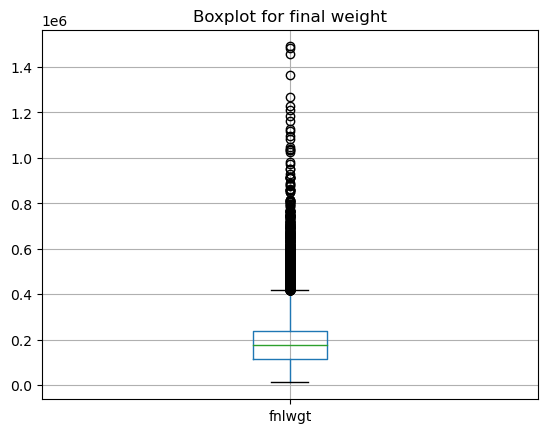

In [13]:
print("Before removing Outliers")
data.boxplot(column='fnlwgt')
plt.title("Boxplot for final weight")
plt.show()

After removing Outliers


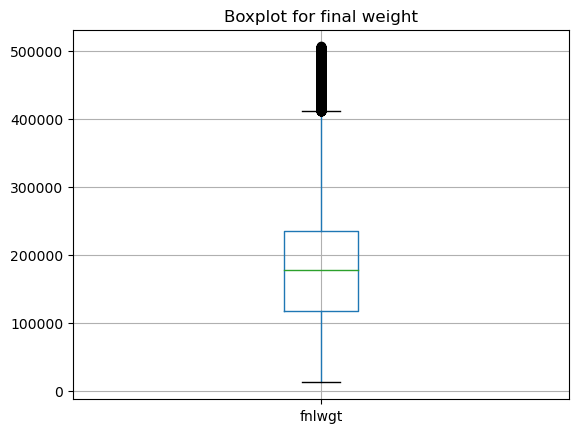

In [14]:
#Removing Outliers using Z-score
z_scores = np.abs(stats.zscore(data['fnlwgt']))
data = data[(z_scores < 3)]  
print("After removing Outliers")
data.boxplot(column='fnlwgt')
plt.title("Boxplot for final weight")
plt.show()

## Visualizing the Data

In [15]:
fig, ax = plt.subplots(1, figsize=(15,5))
for i, col in enumerate(['work_class']):
  sns.countplot(data=data,
                x=col) 

#### Observation:

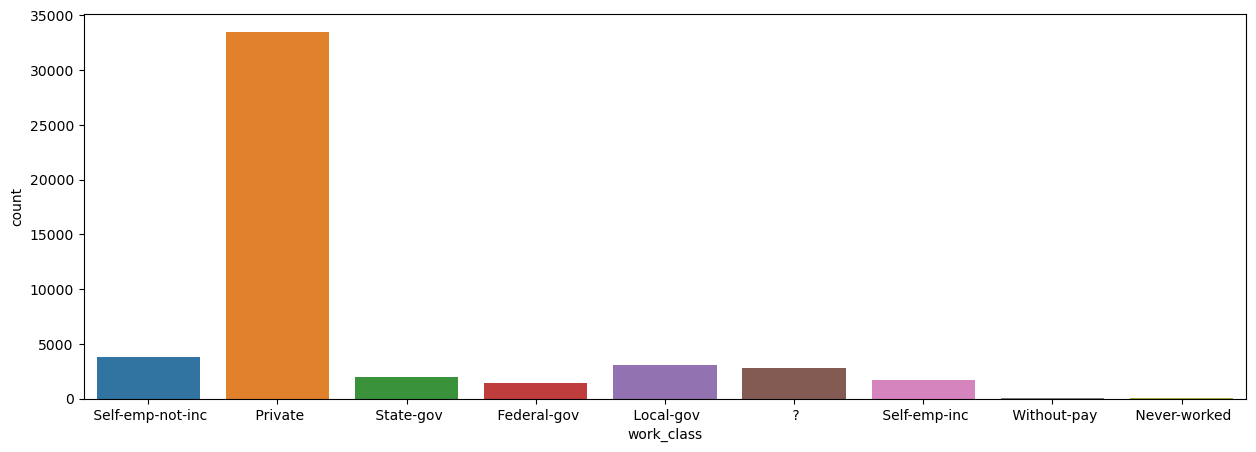

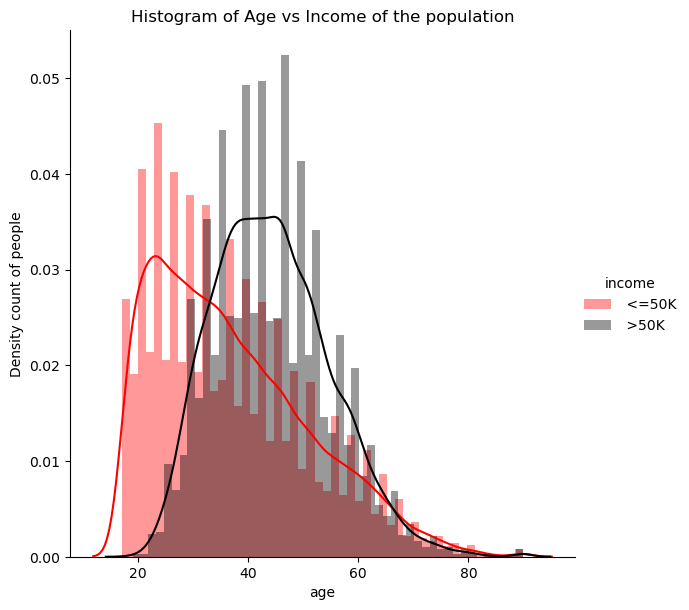

In [16]:
sns.FacetGrid(data,hue='income',height=6,palette=["red","black"]) \
    .map(sns.distplot,'age') \
    .add_legend() \
    .set(ylabel='Density count of people')
plt.title("Histogram of Age vs Income of the population")
plt.show()

#### Observation: The two income groups have an ovelap when compared to the age of the population

In [17]:
fig, ax = plt.subplots(1,figsize=(25,5))
for i, col in enumerate(['education']):
  sns.countplot(data=data,
                x=col,
                hue='income')

#### Observation: People who have completed their Master's or Doctorate have income >50k.

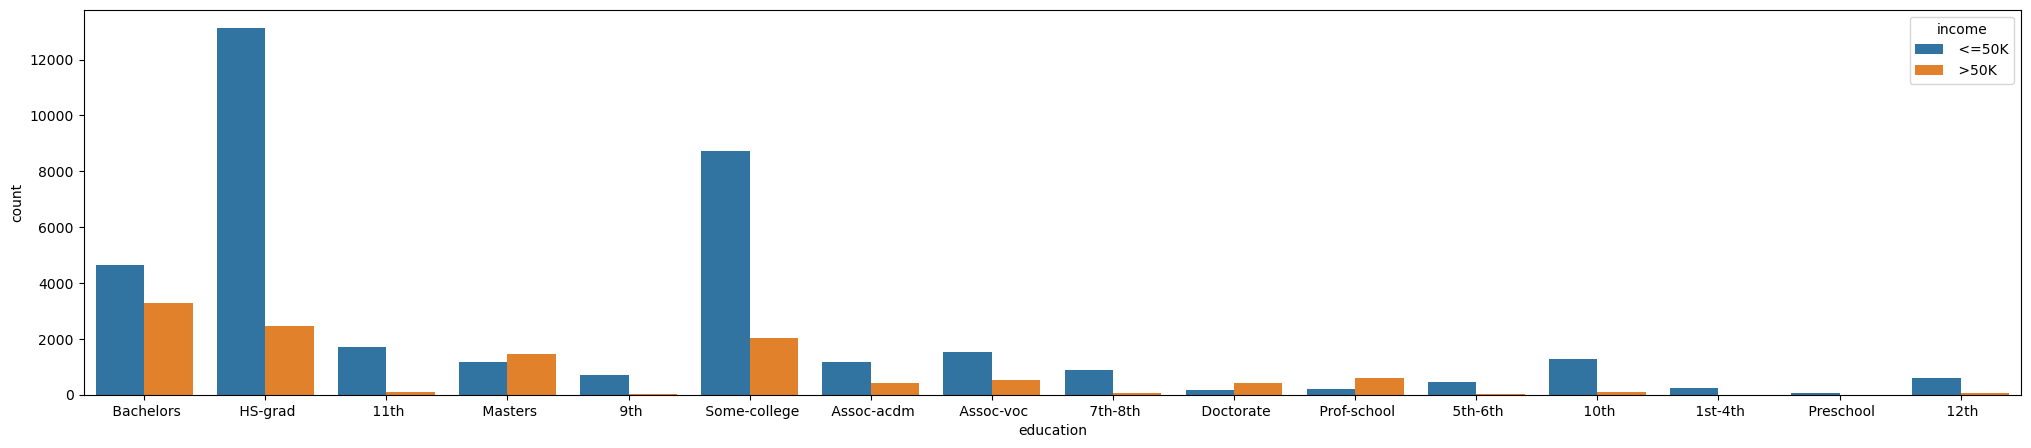

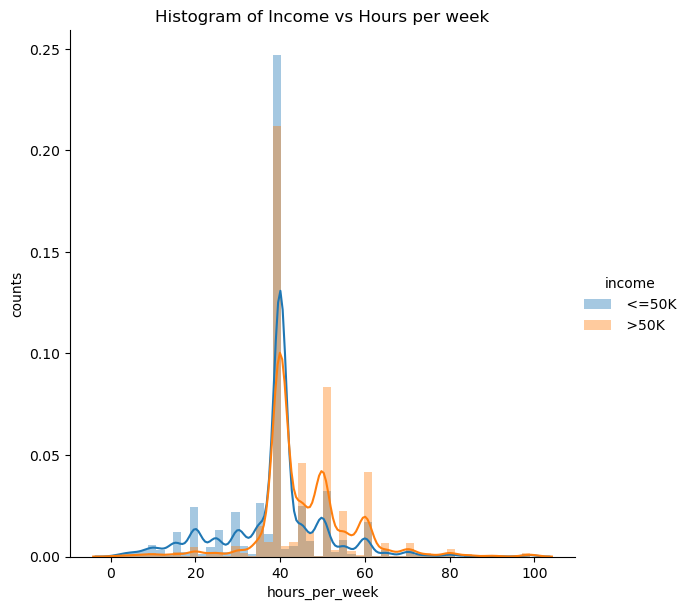

In [18]:
sns.FacetGrid(data,hue='income',height=6) \
    .map(sns.distplot,'hours_per_week') \
    .add_legend() \
    .set(ylabel='counts')
plt.title("Histogram of Income vs Hours per week")
plt.show()

#### Observation: Most people work 40 hours per week. People working more than 40 hours per week probable to have high income.

In [19]:
sns.displot(data, x="age",bins=[0,10,20,30,40,50,60,70,80,90,100],hue='income',palette = ['r','black']).set(title='Distribution of "age" variable')

#### Observation: Overlap is observed between the age groups in terms of their income.

In [20]:
seaborn_facetgrid_object = sns.catplot(
    x='income',
    y='education_num_years',
    col='sex',
    aspect=0.9,
    dodge=False,
    kind='box',
    data=data
)

seaborn_facetgrid_object

#### Observation: People with more educational years have income >50k

In [21]:
sns.boxplot(x='income',y='age',data=data,palette = ['orange','green'])

<Axes: title={'center': 'sex =  Female'}, xlabel='income', ylabel='age'>

#### Observation: People  between the age 40 to 60 years generally have high income

In [22]:
#Multi variate analysis 
sns.pairplot(data,hue="income",palette = ['g','black'])

#### Label encoding non-numerical data

In [23]:
label_encoder_work=preprocessing.LabelEncoder()
data['work_class']=label_encoder_work.fit_transform(data['work_class'])
data['work_class'].unique()

array([6, 4, 7, 1, 2, 0, 5, 8, 3])

In [24]:
label_encoder_education=preprocessing.LabelEncoder()
data['education']=label_encoder_education.fit_transform(data['education'])
data['education'].unique()

array([ 9, 11,  1, 12,  6, 15,  7,  8,  5, 10, 14,  4,  0,  3, 13,  2])

In [25]:
label_encoder_country = preprocessing.LabelEncoder()
data['native_country']=label_encoder_country.fit_transform(data['native_country'])
data['native_country'].unique()

array([39,  5, 23, 19,  0, 26, 35, 33, 16,  9,  2, 11, 20, 30, 22, 31,  4,
        1, 37,  7, 25, 36, 14, 32,  6,  8, 10, 13,  3, 24, 41, 29, 28, 34,
       38, 12, 27, 40, 17, 21, 18, 15])

In [26]:
label_encoder_marital_status = preprocessing.LabelEncoder()
data['marital_status']=label_encoder_marital_status.fit_transform(data['marital_status'])
data['marital_status'].unique()

array([2, 0, 3, 4, 5, 6, 1])

In [27]:
label_encoder_occupation = preprocessing.LabelEncoder()
data['occupation']=label_encoder_occupation.fit_transform(data['occupation'])
data['occupation'].unique()

array([ 4,  6, 10,  8,  1, 12,  3, 14,  5,  7, 13,  0, 11,  2,  9])

In [28]:
label_encoder_relationship = preprocessing.LabelEncoder()
data['relationship']=label_encoder_relationship.fit_transform(data['relationship'])
data['relationship'].unique()

array([0, 1, 5, 3, 4, 2])

In [29]:
label_encoder_race = preprocessing.LabelEncoder()
data['race']=label_encoder_race.fit_transform(data['race'])
data['race'].unique()

array([4, 2, 1, 0, 3])

In [30]:
label_encoder_sex = preprocessing.LabelEncoder()
data['sex']=label_encoder_sex.fit_transform(data['sex'])
data['sex'].unique()

array([1, 0])

In [31]:
label_encoder_income = preprocessing.LabelEncoder()
data['income']=label_encoder_income.fit_transform(data['income'])
data['income'].unique()

array([0, 1])

In [32]:
#Looking at data post encoding
data

,age,work_class,fnlwgt,education,education_num_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,39,4,215419,9,13,0,10,1,4,0,0,0,36,39,0
48837,64,0,321403,11,9,6,0,2,2,1,0,0,40,39,0
48838,38,4,374983,9,13,2,10,0,4,1,0,0,50,39,0
48839,44,4,83891,9,13,0,1,3,1,1,5455,0,40,39,0


**We have used Binning for the variable Age to categorize income for specific age groups**

In [33]:
data['age'] = pd.cut(data['age'], bins=[0,20,40,60,100],labels = ['teen','adults','mid-aged','senior citizen'])

In [34]:
#After binning
data

,age,work_class,fnlwgt,education,education_num_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,mid-aged,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,adults,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,mid-aged,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,adults,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,adults,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,adults,4,215419,9,13,0,10,1,4,0,0,0,36,39,0
48837,senior citizen,0,321403,11,9,6,0,2,2,1,0,0,40,39,0
48838,adults,4,374983,9,13,2,10,0,4,1,0,0,50,39,0
48839,mid-aged,4,83891,9,13,0,1,3,1,1,5455,0,40,39,0


In [35]:
label_encoder_age = preprocessing.LabelEncoder()
data['age']=label_encoder_age.fit_transform(data['age'])
data['age'].unique()

array([1, 0, 3, 2])

In [36]:
#Scaling the features to be in the same scale.
scaler = MinMaxScaler()
data[data.columns] = scaler.fit_transform(data[data.columns])

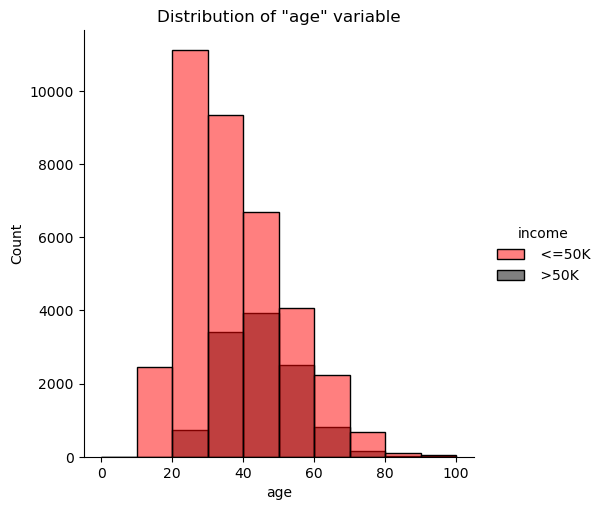

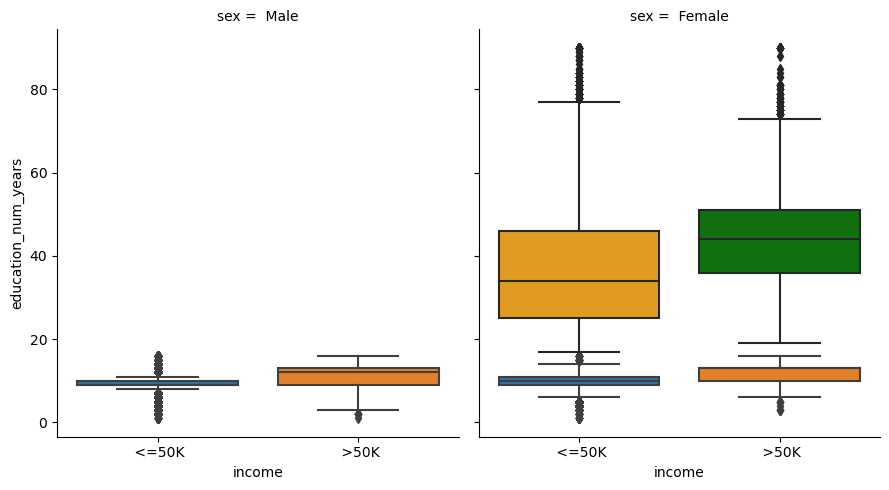

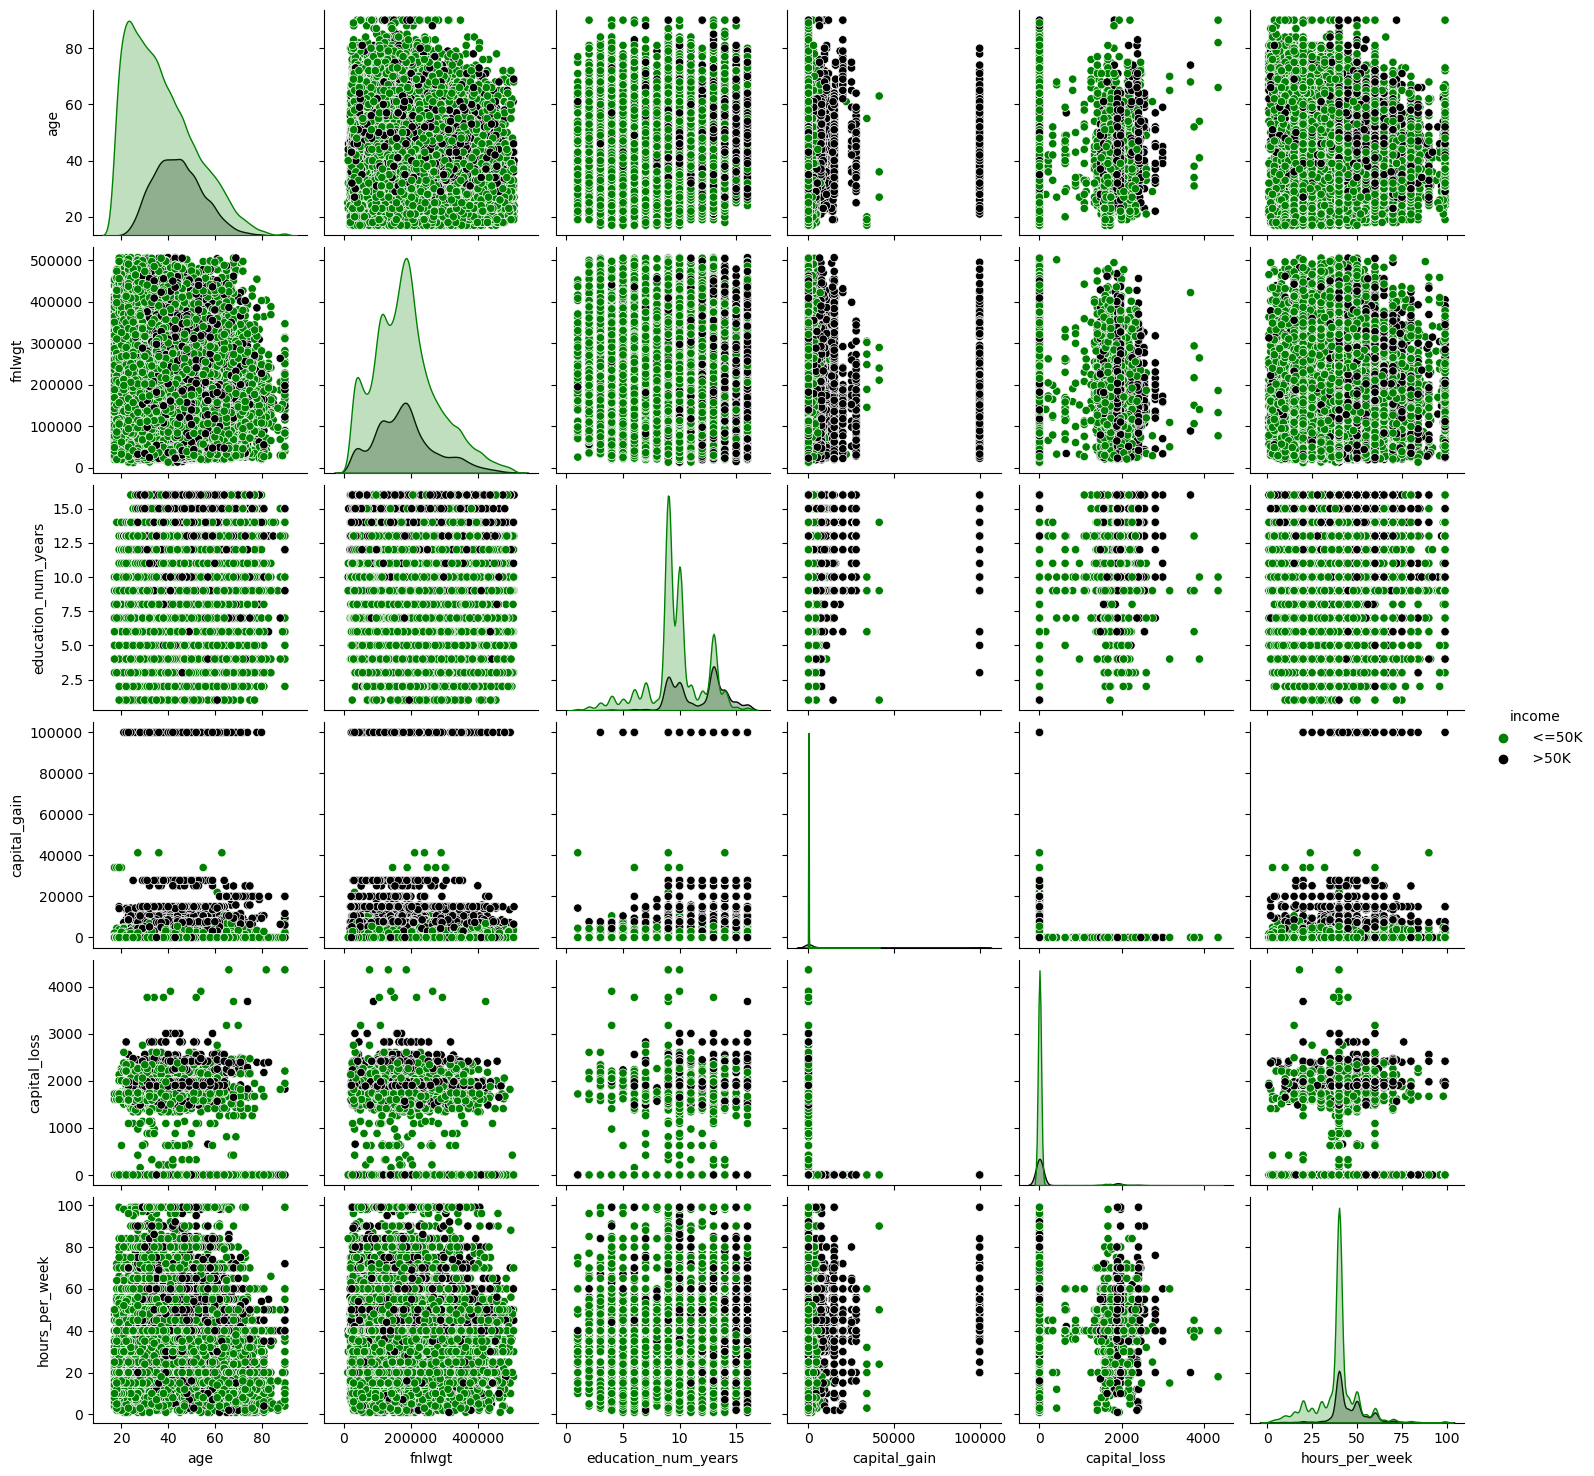

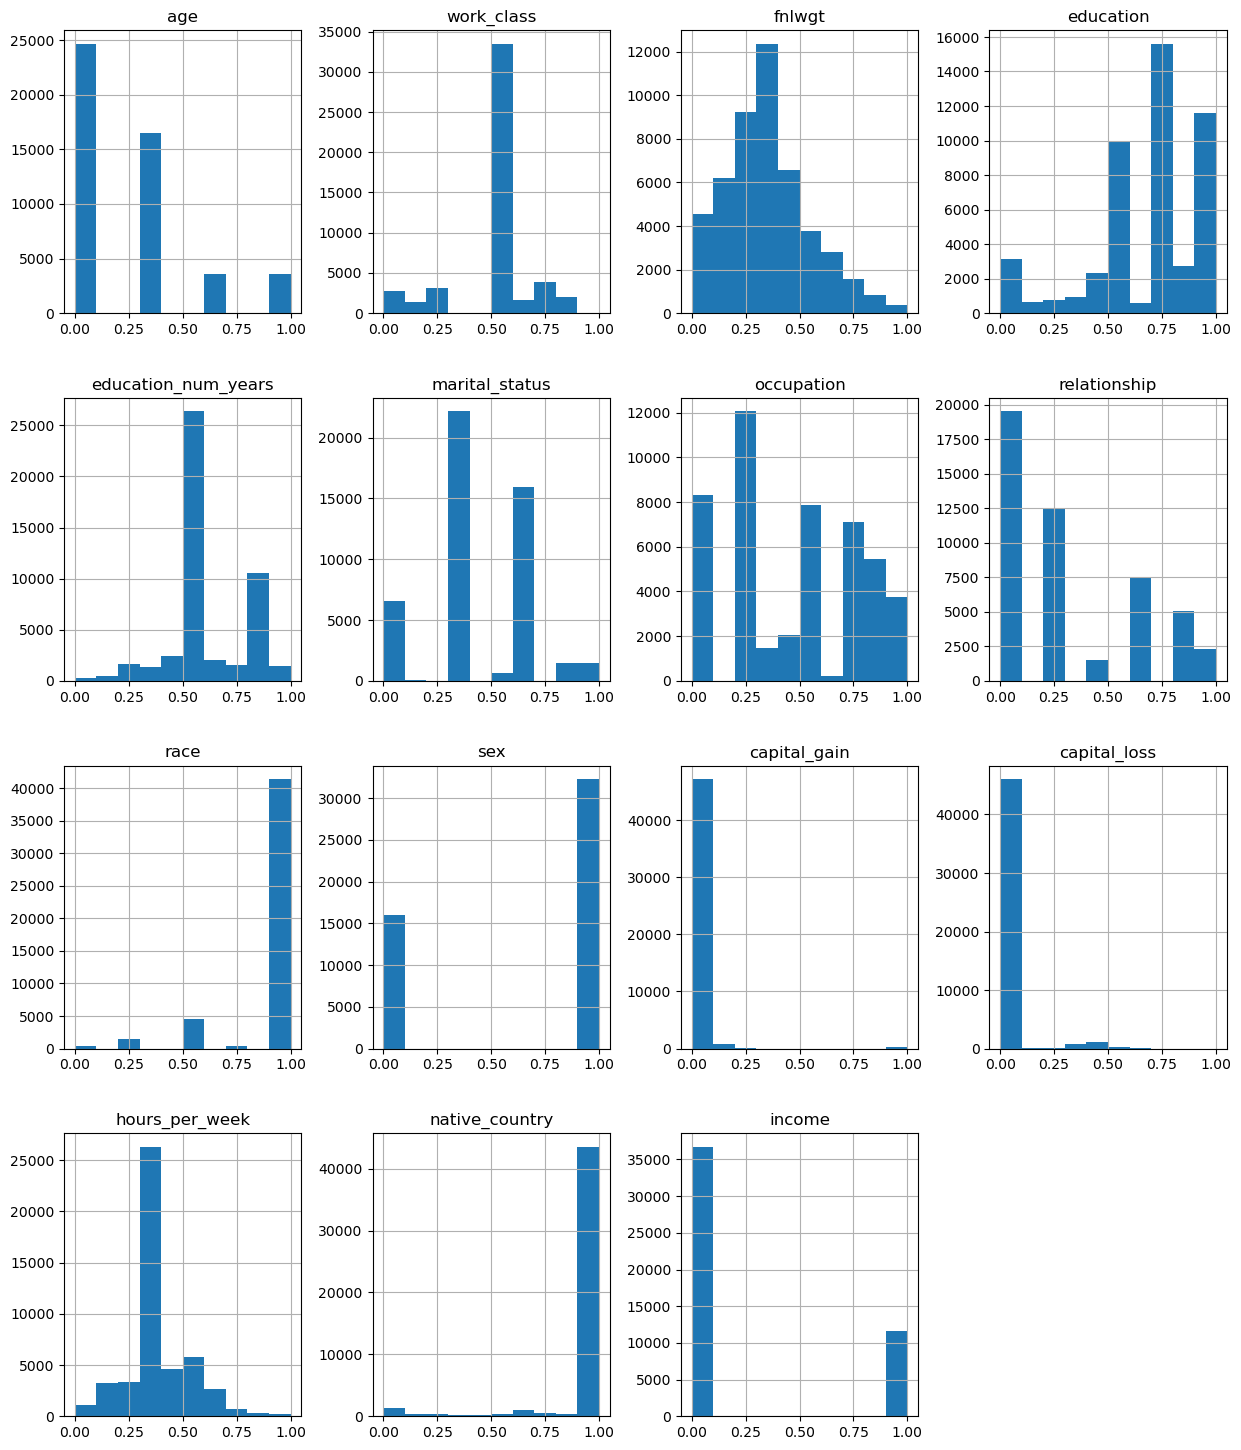

In [37]:
data.hist(figsize=(15,18))
plt.show()

### Feature Selection


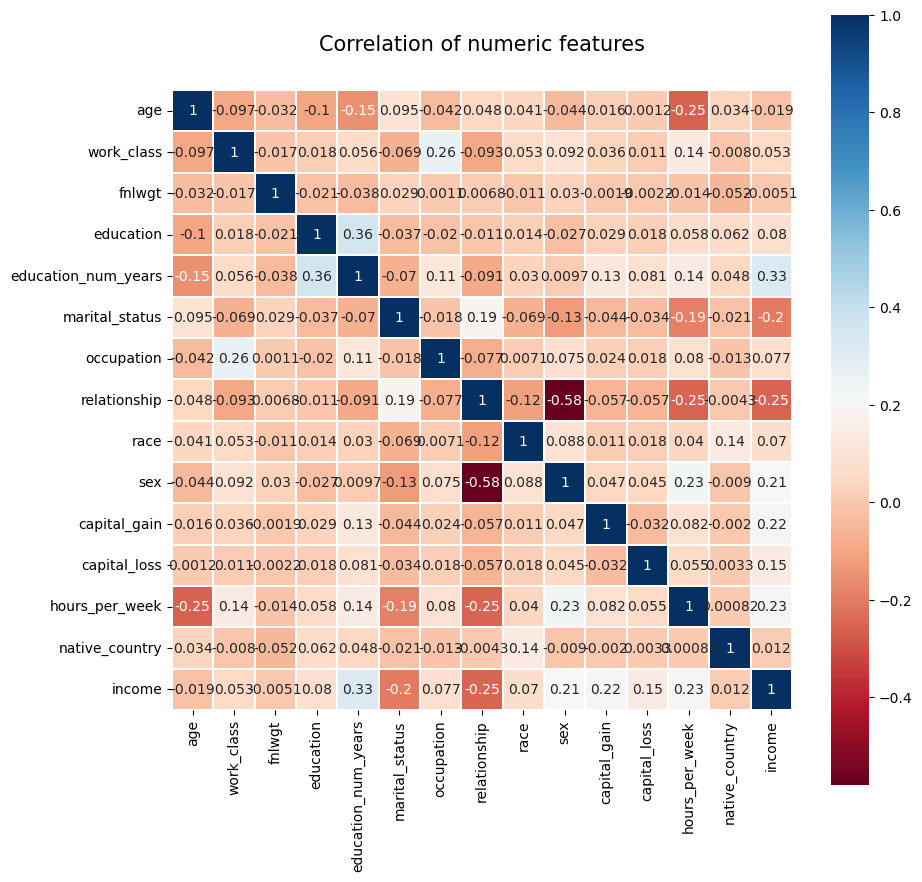

In [38]:
correlation_matrix=data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix,linewidths=0.1,vmax=1.0, square=True, cmap=plt.cm.RdBu, linecolor='white', annot=True)
plt.title("Correlation of numeric features", y=1.05, size=15)
plt.show()

### Observation: education_num_years is most corelated to the target variable

### Finding the features that contribute most to our target variable using Random Forest Classifier

In [39]:
## this code snippet is highly referenced from the Data_preprocessing_walkthrough ipynb provided by Courtney
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(data.drop('income', axis=1), data['income'])

# Print feature importances
pd.DataFrame({'Feature': data.drop('income', axis=1).columns, 'Importance': model.feature_importances_}).sort_values(by='Importance', ascending=False)


,Feature,Importance
2,fnlwgt,0.262656
10,capital_gain,0.121156
7,relationship,0.111818
12,hours_per_week,0.093503
4,education_num_years,0.091036
6,occupation,0.068236
5,marital_status,0.063899
1,work_class,0.042328
11,capital_loss,0.039069
3,education,0.030244


**Dropping native_country as it contributes less towards our target feature**

In [40]:
cols = ['native_country','race','sex']
data = data.drop(cols, axis=1)

In [41]:
#Separing the target
X = data.drop('income',axis = 1)
y = data['income']

In [42]:
#Dimensionality reduction
from sklearn.decomposition import PCA
pca_income = PCA(n_components=7)
X_PCA = pca_income.fit_transform(X)

In [43]:
print("Cumulative Variances (Percentage):")
print(pca_income.explained_variance_ratio_.cumsum() * 100)
print()

Cumulative Variances (Percentage):
[21.95762826 38.84223526 55.49999425 68.04039853 78.59576033 85.34754624
 90.82048929]



In [44]:
#splitting the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5, stratify=y)

## Model: Logistic Regression Model (10-fold CV):

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4],"penalty": ['l1','l2']}]

model = GridSearchCV(LogisticRegression(solver='liblinear'),parameters, cv=10,scoring = "f1")
model.fit(X_train, y_train)

print("Best parameters for models by cross validation are : ",model.best_estimator_)
print("Accuracy:  ",model.score(X_train, y_train))

Best parameters for models by cross validation are :  LogisticRegression(C=10000, penalty='l1', solver='liblinear')
Accuracy:   0.5260569633221774


In [46]:
log_reg = LogisticRegression(C=100,penalty='l1',solver = 'liblinear')
log_reg.fit(X_train, y_train)
y_pred=log_reg.predict(X_test)

**Checking the accuracy and F1 score for the model**

In [47]:
from sklearn.metrics import classification_report,f1_score,accuracy_score,confusion_matrix

acc_log_reg_train = log_reg.score(X_train, y_train)
acc_log_reg_test = accuracy_score(y_test,y_pred)
f1_log_reg_test = f1_score(y_test,y_pred)

print("Model: Logistic Regression Model (10-fold CV): ")
print("Training Accuracy: ", acc_log_reg_train)
print("Test Accuracy for Logistic Regression Model : ",acc_log_reg_test)
print("\nConfusion Matrix for the above model : \n\n",confusion_matrix(y_test,y_pred))
print("\nThe Classification Report: \n\n",classification_report(y_test, y_pred))
print("\nF1-Score for Logistic Regression Model : ",f1_log_reg_test)

Model: Logistic Regression Model (10-fold CV): 
Training Accuracy:  0.8203541655879459
Test Accuracy for Logistic Regression Model :  0.8228228228228228

Confusion Matrix for the above model : 

 [[6976  368]
 [1343  970]]

The Classification Report: 

               precision    recall  f1-score   support

         0.0       0.84      0.95      0.89      7344
         1.0       0.72      0.42      0.53      2313

    accuracy                           0.82      9657
   macro avg       0.78      0.68      0.71      9657
weighted avg       0.81      0.82      0.80      9657


F1-Score for Logistic Regression Model :  0.5313612708846892


## Model: Batch GD_log_loss (Logistic Regression Model)  (100 epochs):

In [48]:
from sklearn.linear_model import SGDClassifier

clf1 = SGDClassifier(penalty='l2',max_iter=100, loss='log',alpha = 1e-6,learning_rate='optimal',random_state = 10)
clf1=clf1.fit(X_train,y_train)
y_pred = clf1.predict(X_test)

acc_batch_gd_train = clf1.score(X_train, y_train)
acc_batch_gd_test = accuracy_score(y_test,y_pred)
f1_batch_gd_test = f1_score(y_test,y_pred)


print("Model: Batch GD_log_loss (Logistic Regression Model)  (100 epochs): ")
print("Training Accuracy: ",acc_batch_gd_train)
print("Test Accuracy : ",acc_batch_gd_test)
print("\nConfusion Matrix for the above model : \n\n",confusion_matrix(y_test,y_pred))
print("\nThe Classification Report: \n\n",classification_report(y_test, y_pred))
print("\nF1-Score for Batch GD Logistic Regression Model : ",f1_batch_gd_test)

Model: Batch GD_log_loss (Logistic Regression Model)  (100 epochs): 
Training Accuracy:  0.8145031843835758
Test Accuracy :  0.8153670912291602

Confusion Matrix for the above model : 

 [[6928  416]
 [1367  946]]

The Classification Report: 

               precision    recall  f1-score   support

         0.0       0.84      0.94      0.89      7344
         1.0       0.69      0.41      0.51      2313

    accuracy                           0.82      9657
   macro avg       0.76      0.68      0.70      9657
weighted avg       0.80      0.82      0.80      9657


F1-Score for Batch GD Logistic Regression Model :  0.5148299319727891


## Model: SGD_log_loss Logistic Regression Model (L1 regularization) :

In [49]:
from sklearn.linear_model import SGDClassifier

clf2 = SGDClassifier(penalty='l1', loss='log',alpha = 1e-3, random_state = 10)
clf2 = clf2.fit(X_train,y_train)
y_pred=clf2.predict(X_test)

acc_sgd_train = clf2.score(X_train, y_train)
acc_sgd_test = accuracy_score(y_test,y_pred)
f1_sgd_test = f1_score(y_test,y_pred)

print("Model: SGD_log_loss Logistic Regression Model (L1 regularization) : ")
print("Training Accuracy: ",acc_sgd_train)
print("Test Accuracy : ",acc_sgd_test)
print("\nConfusion Matrix for the above model : \n\n",confusion_matrix(y_test,y_pred))
print("\nThe Classification Report: \n\n",classification_report(y_test, y_pred))
print("\nF1-Score for SGD Logistic Regression Model : ",f1_sgd_test)

Model: SGD_log_loss Logistic Regression Model (L1 regularization) : 
Training Accuracy:  0.8172733392015741
Test Accuracy :  0.8213730972351662

Confusion Matrix for the above model : 

 [[6932  412]
 [1313 1000]]

The Classification Report: 

               precision    recall  f1-score   support

         0.0       0.84      0.94      0.89      7344
         1.0       0.71      0.43      0.54      2313

    accuracy                           0.82      9657
   macro avg       0.77      0.69      0.71      9657
weighted avg       0.81      0.82      0.80      9657


F1-Score for SGD Logistic Regression Model :  0.5369127516778524


### SGD with PCA Components 

In [50]:
from sklearn.linear_model import SGDClassifier


X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_PCA, y, test_size=0.2, random_state=5, stratify=y)
clf5 = SGDClassifier(penalty='l2', loss='log',alpha = 1e-5, random_state = 10)
clf5 = clf5.fit(X_train_pca,y_train)
y_pred=clf5.predict(X_test_pca)

acc_sgdp_train = clf5.score(X_train_pca, y_train)
acc_sgdp_test = accuracy_score(y_test,y_pred)
f1_sgdp_test = f1_score(y_test,y_pred)

print("Model: SGD_log_loss Logistic Regression Model (L1 regularization) : ")
print("Training Accuracy: ",acc_sgdp_train)
print("Test Accuracy : ",acc_sgdp_test)
print("\nConfusion Matrix for the above model : \n\n",confusion_matrix(y_test,y_pred))
print("\nThe Classification Report: \n\n",classification_report(y_test, y_pred))
print("\nF1-Score for SGD Logistic Regression Model : ",f1_sgdp_test)

Model: SGD_log_loss Logistic Regression Model (L1 regularization) : 
Training Accuracy:  0.7426086056024439
Test Accuracy :  0.7401884643263954

Confusion Matrix for the above model : 

 [[6309 1035]
 [1474  839]]

The Classification Report: 

               precision    recall  f1-score   support

         0.0       0.81      0.86      0.83      7344
         1.0       0.45      0.36      0.40      2313

    accuracy                           0.74      9657
   macro avg       0.63      0.61      0.62      9657
weighted avg       0.72      0.74      0.73      9657


F1-Score for SGD Logistic Regression Model :  0.40076427036064005


Using the model with PCA components has not affected the results significantly

### Model : SVC with rbf kernel without optimization

In [51]:
from sklearn.svm import SVC
clf4 = SVC(C=1.0, kernel='rbf',random_state = 10)
clf4 = clf4.fit(X_train,y_train)
y_pred = clf4.predict(X_test)

acc_svc_train = clf4.score(X_train, y_train)
acc_svc_test = accuracy_score(y_test,y_pred)
f1_svc_test = f1_score(y_test,y_pred)

print("Model: Support Vector Classification (L1-reg): ")
print("Training Accuracy: ",acc_svc_train)
print("Test Accuracy : ",acc_svc_test)
print("\nConfusion Matrix for the above model : \n\n",confusion_matrix(y_test,y_pred))
print("\nThe Classification Report: \n\n",classification_report(y_test, y_pred))
print("\nF1-Score for Support Vector Classifier : ",f1_svc_test)

Model: Support Vector Classification (L1-reg): 
Training Accuracy:  0.8477709314969192
Test Accuracy :  0.8481930206068137

Confusion Matrix for the above model : 

 [[6926  418]
 [1048 1265]]

The Classification Report: 

               precision    recall  f1-score   support

         0.0       0.87      0.94      0.90      7344
         1.0       0.75      0.55      0.63      2313

    accuracy                           0.85      9657
   macro avg       0.81      0.74      0.77      9657
weighted avg       0.84      0.85      0.84      9657


F1-Score for Support Vector Classifier :  0.6331331331331331


## Results:

In [52]:
models = pd.DataFrame({
    'Model': ['Logistic Regression with 10-fold CV', 'Batch Gradient Descent with optimal learning rate & l2 penalty','Stochastic Gradient Descent with optimal learning rate & l2 penalty','SGD with PCA', 'SVC with rbf kernel'],
    'F1-Score': [f1_log_reg_test, f1_batch_gd_test, f1_sgd_test,f1_sgdp_test,f1_svc_test],
    'Train Accuracy': [acc_log_reg_train*100,acc_batch_gd_train*100,acc_sgd_train*100,acc_sgdp_train*100,acc_svc_train*100],
    'Test Accuracy': [acc_log_reg_test*100,acc_batch_gd_test*100,acc_sgd_test*100,acc_sgdp_test*100,acc_svc_test*100]})
models.sort_values(by='F1-Score', ascending=False)

,Model,F1-Score,Train Accuracy,Test Accuracy
4,SVC with rbf kernel,0.633133,84.777093,84.819302
2,Stochastic Gradient Descent with optimal learn...,0.536913,81.727334,82.137310
0,Logistic Regression with 10-fold CV,0.531361,82.035417,82.282282
1,Batch Gradient Descent with optimal learning r...,0.514830,81.450318,81.536709
3,SGD with PCA,0.400764,74.260861,74.018846


## Conclusion: 

### 1.After Testing different models on the Census Income Dataset, We concluded that the best suitable model for this classification problem is the SVC with the rbf kernel as the data was not linearly seperable. 
### 2.Among the linear models, the SGD model has the best F1 - Score and performance with regularization.